Approach-1

In [9]:
from collections import defaultdict
import numpy as np

def char_frequencies(text):
    frequency = defaultdict(int)
    for char in text:
        frequency[char] += 1
    total_chars = sum(frequency.values())
    return {char: freq / total_chars for char, freq in frequency.items()}

def bigram_frequencies(text):
    return defaultdict(int, ((text[i:i + 2], text.count(text[i:i + 2])) for i in range(len(text) - 1)))

def text_segments(text, segment_size=120):
    return (text[i:i + segment_size] for i in range(0, len(text), segment_size))

def avg_frequencies(plaintexts):
    total_freqs = defaultdict(int)
    total_chars = 0

    for text in plaintexts:
        for segment in text_segments(text):
            for char in segment:
                total_freqs[char] += 1
                total_chars += 1

    return sorted(((char, freq / total_chars) for char, freq in total_freqs.items()), key=lambda x: -x[1])

def create_mapping(cipher_segment, avg_freq_order):
    cipher_freq = sorted(char_frequencies(cipher_segment).items(), key=lambda x: -x[1])
    min_length = min(len(cipher_freq), len(avg_freq_order))
    return {c: p for (c, _), p in zip(cipher_freq[:min_length], avg_freq_order[:min_length])}

def levenshtein(s1, s2):
    m, n = len(s1), len(s2)
    dp = np.zeros((m + 1, n + 1), dtype=int)

    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            dp[i][j] = min(dp[i - 1][j] + 1, dp[i][j - 1] + 1, dp[i - 1][j - 1] + cost)

    return dp[m][n]

def score_segment(cipher_seg, plain_seg, mapping):
    mapped = ''.join(mapping.get(c, c) for c in cipher_seg)
    edit_dist_score = max(len(plain_seg) - levenshtein(mapped, plain_seg), 0)

    cipher_bigrams = bigram_frequencies(cipher_seg)
    plain_bigrams = bigram_frequencies(plain_seg)
    common = set(cipher_bigrams.keys()) & set(plain_bigrams.keys())
    bigram_score = sum(min(cipher_bigrams[bg], plain_bigrams[bg]) for bg in common)

    return edit_dist_score + bigram_score

def find_best_match(ciphertext, plaintexts, iterations=3):
    best_plaintext = None
    highest_score = float('-inf')

    for _ in range(iterations):
        avg_freq_order = [char for char, _ in avg_frequencies(plaintexts)]
        cipher_segments = list(text_segments(ciphertext, len(ciphertext) // 5))

        for plaintext in plaintexts:
            total_score = 0
            plain_segments = list(text_segments(plaintext, len(plaintext) // 5))

            for cseg in cipher_segments:
                mapping = create_mapping(cseg, avg_freq_order)
                segment_scores = [score_segment(cseg, pseg, mapping) for pseg in plain_segments]
                total_score += max(segment_scores, default=0)

            if total_score > highest_score:
                highest_score = total_score
                best_plaintext = plaintext

    return best_plaintext, highest_score

plaintexts = [
        "unconquerable tropical pythagoras rebukingly price ephedra barmiest hastes spades fevers cause wisped overdecorates linked smitten trickle scanning cognize oaken casework significate influenceable precontrived clockers defalcation fruitless splintery kids placidness regenerate harebrained liberalism neuronic clavierist attendees matinees prospectively bubbies longitudinal raving relaxants rigged oxygens chronologist briniest tweezes profaning abeyances fixity gulls coquetted budgerigar drooled unassertive shelter subsoiling surmounted frostlike jobbed hobnailed fulfilling jaywalking testabilit",
        "protectorates committeemen refractory narcissus bridlers weathercocks occluding orchectomy syncoms denunciation chronaxy imperilment incurred defrosted beamy opticopupillary acculturation scouting curiousest tosh preconscious weekday reich saddler politicize mercerizes saucepan bifold chit reviewable easiness brazed essentially idler dependable predicable locales rededicated cowbird kvetched confusingly airdrops dreggier privileges tempter anaerobes glistened sartorial distrustfulness papillary ughs proctoring duplexed pitas traitorously unlighted cryptographer odysseys metamer either meliorat",
        "incomes shoes porcine pursue blabbered irritable ballets grabbed scything oscillogram despots pharynxes recompensive disarraying ghoulish mariachi wickerwork orientation candidnesses nets opalescing friending wining cypher headstrong insubmissive oceanid bowlegs voider recook parochial trop gravidly vomiting hurray friended uncontestable situate fen cyclecars gads macrocosms dhyana overruns impolite europe cynical jennet tumor noddy canted clarion opiner incurring knobbed planeload megohm dejecting campily dedicational invaluable praecoces coalescence dibbuk bustles flay acuities centimeters l",
        "rejoicing nectar asker dreadfuls kidnappers interstate incrusting quintessential neglecter brewage phosphatic angle obliquely bean walkup outflowed squib tightwads trenched pipe extents streakier frowning phantasmagories supinates imbibers inactivates tingly deserter steerages beggared pulsator laity salvageable bestrode interning stodgily cracker excisions quanted arranges poultries sleds shortly packages apparat fledge alderwomen halvah verdi ineffectualness entrenches franchising merchantability trisaccharide limekiln sportsmanship lassitudes recidivistic locating iou wardress estrus potboi",
        "headmaster attractant subjugator peddlery vigil dogfights pixyish comforts aretes felinities copycat salerooms schmeering institutor hairlocks speeder composers dramatics eyeholes progressives reminiscent hermaphrodism simultaneous spondaics hayfork armory refashioning battering darning tapper pancaked unaffected televiewer mussiness pollbook sieved reclines restamp cohosh excludes homelier coacts refashioned loiterer prospectively encouragers biggest pasters modernity governorships crusted buttoned wallpapered enamors supervisal nervily groaning disembody communion embosoming tattles pancakes"
]


# Testing with ciphertext input


ciphertext = input("Enter the ciphertext: ")

# Get best match and display results
best_plaintext, score = find_best_match(ciphertext, plaintexts, iterations=3)
print(f"Best matching plaintext: {best_plaintext}")
print(f"Match score: {score}")


Enter the ciphertext: wtlitcwrpdeyrjfmpisxludyjseqfud ipdzjprewoxt yqjspxlrjrsurkpdjedpgxrzfjudzfrzjzsdkrzjnrmrqpzjldwzrjvxzsrkjimrpkrlipodfrzjyxtorkjzgxffrtj fpxloyrjzldttxt jlit tqxhrrjidortjldzrvipojzx txnkxldfrjxtnywrtlrdeyrajsprlitfpxmrkjlyilorptzjkrndwtyldfnxitjnpwxfyrzzjzsyxtfrrpqjoxkazjsy dlrxktrzzjpqr rtrpdfjrjudprepdxtrbkjgytxerpdyxzgjtrwnpitxlljlydmxrpxzofjdffrtkrrzjgadfxtgrrzjspizsrlfxmra yqjeweexrzjyit xfwkxtdyjpdmxt jprydbsdqtfzjpx rkjibq rtzjlupitiyi xzfjepxtxrzfjfvrrhrzjspindtxt jderqdtlrzjnxbxfqj wyyzjlicwrffrkjewk rpx dpjkpiinyrkjwtdzzrpfxmrwjzuryfrpjzwezixyxt jzwpgiwtfrkjnspizfyxorjaieewrkjuietdxyrkjnwynxyyxt jadqvdyoxt jfrzfdexyxf
Best matching plaintext: unconquerable tropical pythagoras rebukingly price ephedra barmiest hastes spades fevers cause wisped overdecorates linked smitten trickle scanning cognize oaken casework significate influenceable precontrived clockers defalcation fruitless splintery kids placidness regenerate harebrained liberalism neuronic clavie

Probability: 0.00, Runtime: 16.2924 seconds
Probability: 0.05, Runtime: 10.9067 seconds
Probability: 0.10, Runtime: 10.5304 seconds
Probability: 0.20, Runtime: 10.9715 seconds
Probability: 0.30, Runtime: 13.2003 seconds
Probability: 0.40, Runtime: 11.0327 seconds
Probability: 0.50, Runtime: 10.9840 seconds


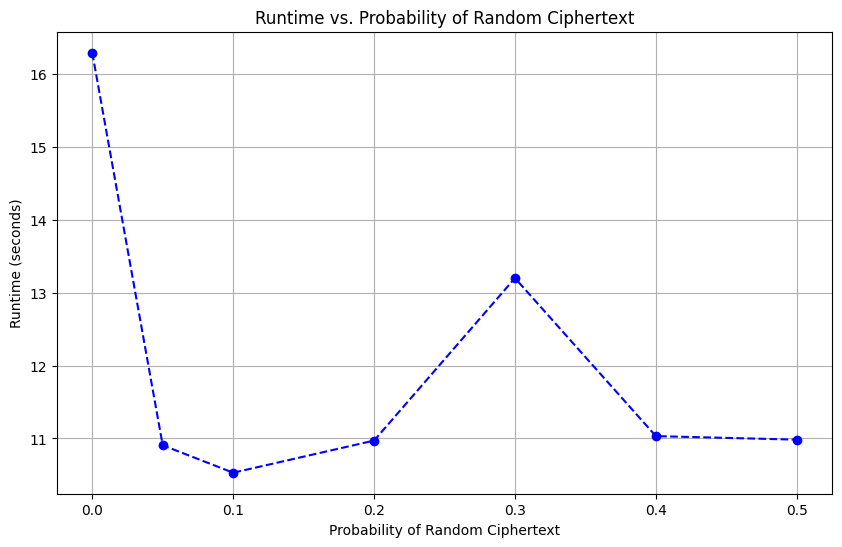

In [10]:
import random
import time
import matplotlib.pyplot as plt

def inject_randomness(ciphertext, prob_of_random_ciphertext=0.1):
    """Replace characters with random ones based on the given probability."""
    random_chars = "abcdefghijklmnopqrstuvwxyz"
    new_text = [
        random.choice(random_chars) if random.random() < prob_of_random_ciphertext else c
        for c in ciphertext
    ]
    return ''.join(new_text)

def measure_runtime(ciphertext, plaintexts, prob_of_random_ciphertext):
    """Inject randomness, measure runtime, and return elapsed time."""
    randomized_ciphertext = inject_randomness(ciphertext, prob_of_random_ciphertext)
    start_time = time.time()
    _, _ = find_best_match(randomized_ciphertext, plaintexts, iterations=3)
    return time.time() - start_time

def run_experiment(ciphertext, plaintexts, probs):
    """Measure runtime for a range of probabilities and return results."""
    runtimes = []
    for prob in probs:
        runtime = measure_runtime(ciphertext, plaintexts, prob)
        runtimes.append(runtime)
        print(f"Probability: {prob:.2f}, Runtime: {runtime:.4f} seconds")
    return runtimes

plaintexts = [
        "unconquerable tropical pythagoras rebukingly price ephedra barmiest hastes spades fevers cause wisped overdecorates linked smitten trickle scanning cognize oaken casework significate influenceable precontrived clockers defalcation fruitless splintery kids placidness regenerate harebrained liberalism neuronic clavierist attendees matinees prospectively bubbies longitudinal raving relaxants rigged oxygens chronologist briniest tweezes profaning abeyances fixity gulls coquetted budgerigar drooled unassertive shelter subsoiling surmounted frostlike jobbed hobnailed fulfilling jaywalking testabilit",
        "protectorates committeemen refractory narcissus bridlers weathercocks occluding orchectomy syncoms denunciation chronaxy imperilment incurred defrosted beamy opticopupillary acculturation scouting curiousest tosh preconscious weekday reich saddler politicize mercerizes saucepan bifold chit reviewable easiness brazed essentially idler dependable predicable locales rededicated cowbird kvetched confusingly airdrops dreggier privileges tempter anaerobes glistened sartorial distrustfulness papillary ughs proctoring duplexed pitas traitorously unlighted cryptographer odysseys metamer either meliorat",
        "incomes shoes porcine pursue blabbered irritable ballets grabbed scything oscillogram despots pharynxes recompensive disarraying ghoulish mariachi wickerwork orientation candidnesses nets opalescing friending wining cypher headstrong insubmissive oceanid bowlegs voider recook parochial trop gravidly vomiting hurray friended uncontestable situate fen cyclecars gads macrocosms dhyana overruns impolite europe cynical jennet tumor noddy canted clarion opiner incurring knobbed planeload megohm dejecting campily dedicational invaluable praecoces coalescence dibbuk bustles flay acuities centimeters l",
        "rejoicing nectar asker dreadfuls kidnappers interstate incrusting quintessential neglecter brewage phosphatic angle obliquely bean walkup outflowed squib tightwads trenched pipe extents streakier frowning phantasmagories supinates imbibers inactivates tingly deserter steerages beggared pulsator laity salvageable bestrode interning stodgily cracker excisions quanted arranges poultries sleds shortly packages apparat fledge alderwomen halvah verdi ineffectualness entrenches franchising merchantability trisaccharide limekiln sportsmanship lassitudes recidivistic locating iou wardress estrus potboi",
        "headmaster attractant subjugator peddlery vigil dogfights pixyish comforts aretes felinities copycat salerooms schmeering institutor hairlocks speeder composers dramatics eyeholes progressives reminiscent hermaphrodism simultaneous spondaics hayfork armory refashioning battering darning tapper pancaked unaffected televiewer mussiness pollbook sieved reclines restamp cohosh excludes homelier coacts refashioned loiterer prospectively encouragers biggest pasters modernity governorships crusted buttoned wallpapered enamors supervisal nervily groaning disembody communion embosoming tattles pancakes"
]

ciphertext = "wtlitcwrpdeyrjfmpisxludyjseqfud ipdzjprewoxt yqjspxlrjrsurkpdjedpgxrzfjudzfrzjzsdkrzjnrmrqpzjldwzrjvxzsrkjimrpkrlipodfrzjyxtorkjzgxffrtj fpxloyrjzldttxt jlit tqxhrrjidortjldzrvipojzx txnkxldfrjxtnywrtlrdeyrajsprlitfpxmrkjlyilorptzjkrndwtyldfnxitjnpwxfyrzzjzsyxtfrrpqjoxkazjsy dlrxktrzzjpqr rtrpdfjrjudprepdxtrbkjgytxerpdyxzgjtrwnpitxlljlydmxrpxzofjdffrtkrrzjgadfxtgrrzjspizsrlfxmra yqjeweexrzjyit xfwkxtdyjpdmxt jprydbsdqtfzjpx rkjibq rtzjlupitiyi xzfjepxtxrzfjfvrrhrzjspindtxt jderqdtlrzjnxbxfqj wyyzjlicwrffrkjewk rpx dpjkpiinyrkjwtdzzrpfxmrwjzuryfrpjzwezixyxt jzwpgiwtfrkjnspizfyxorjaieewrkjuietdxyrkjnwynxyyxt jadqvdyoxt jfrzfdexyxf"

# Define a range of probabilities for experimentation
probs = [0.0, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]

# Run the experiment and collect runtimes
runtimes = run_experiment(ciphertext, plaintexts, probs)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(probs, runtimes, marker='o', linestyle='--', color='b')
plt.title("Runtime vs. Probability of Random Ciphertext")
plt.xlabel("Probability of Random Ciphertext")
plt.ylabel("Runtime (seconds)")
plt.grid(True)
plt.show()


In [11]:
import random
import time
import matplotlib.pyplot as plt

def inject_randomness(ciphertext, prob_of_random_ciphertext=0.1):
    """Replace characters with random ones based on the given probability."""
    random_chars = "abcdefghijklmnopqrstuvwxyz"
    new_text = [
        random.choice(random_chars) if random.random() < prob_of_random_ciphertext else c
        for c in ciphertext
    ]
    return ''.join(new_text)

def measure_runtime(ciphertext, plaintexts, prob_of_random_ciphertext):
    """Inject randomness, measure runtime, and return elapsed time."""
    randomized_ciphertext = inject_randomness(ciphertext, prob_of_random_ciphertext)
    start_time = time.time()
    _, _ = find_best_match(randomized_ciphertext, plaintexts, iterations=3)
    return time.time() - start_time

def run_experiment_with_plaintext_sizes(ciphertext, full_plaintext_list, probs, sizes):
    """Test with varying number of plaintexts and probabilities."""
    results = {}
    for prob in probs:
        runtimes = []
        print(f"\nTesting with prob_of_random_ciphertext = {prob:.2f}")
        for size in sizes:
            selected_plaintexts = full_plaintext_list[:size]
            runtime = measure_runtime(ciphertext, selected_plaintexts, prob)
            runtimes.append(runtime)
            print(f"Size: {size}, Runtime: {runtime:.4f} seconds")
        results[prob] = runtimes
    return results

def plot_results(sizes, results):
    """Plot the runtime as a function of plaintext size for each probability."""
    plt.figure(figsize=(12, 8))
    for prob, runtimes in results.items():
        plt.plot(sizes, runtimes, marker='o', linestyle='--', label=f'Prob: {prob:.2f}')
    plt.title("Runtime vs. Number of Candidate Plaintexts")
    plt.xlabel("Number of Candidate Plaintexts")
    plt.ylabel("Runtime (seconds)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Sample dictionary with many candidate plaintexts (you can add more)
full_plaintext_list = [
        "unconquerable tropical pythagoras rebukingly price ephedra barmiest hastes spades fevers cause wisped overdecorates linked smitten trickle scanning cognize oaken casework significate influenceable precontrived clockers defalcation fruitless splintery kids placidness regenerate harebrained liberalism neuronic clavierist attendees matinees prospectively bubbies longitudinal raving relaxants rigged oxygens chronologist briniest tweezes profaning abeyances fixity gulls coquetted budgerigar drooled unassertive shelter subsoiling surmounted frostlike jobbed hobnailed fulfilling jaywalking testabilit",
        "protectorates committeemen refractory narcissus bridlers weathercocks occluding orchectomy syncoms denunciation chronaxy imperilment incurred defrosted beamy opticopupillary acculturation scouting curiousest tosh preconscious weekday reich saddler politicize mercerizes saucepan bifold chit reviewable easiness brazed essentially idler dependable predicable locales rededicated cowbird kvetched confusingly airdrops dreggier privileges tempter anaerobes glistened sartorial distrustfulness papillary ughs proctoring duplexed pitas traitorously unlighted cryptographer odysseys metamer either meliorat",
        "incomes shoes porcine pursue blabbered irritable ballets grabbed scything oscillogram despots pharynxes recompensive disarraying ghoulish mariachi wickerwork orientation candidnesses nets opalescing friending wining cypher headstrong insubmissive oceanid bowlegs voider recook parochial trop gravidly vomiting hurray friended uncontestable situate fen cyclecars gads macrocosms dhyana overruns impolite europe cynical jennet tumor noddy canted clarion opiner incurring knobbed planeload megohm dejecting campily dedicational invaluable praecoces coalescence dibbuk bustles flay acuities centimeters l",
        "rejoicing nectar asker dreadfuls kidnappers interstate incrusting quintessential neglecter brewage phosphatic angle obliquely bean walkup outflowed squib tightwads trenched pipe extents streakier frowning phantasmagories supinates imbibers inactivates tingly deserter steerages beggared pulsator laity salvageable bestrode interning stodgily cracker excisions quanted arranges poultries sleds shortly packages apparat fledge alderwomen halvah verdi ineffectualness entrenches franchising merchantability trisaccharide limekiln sportsmanship lassitudes recidivistic locating iou wardress estrus potboi",
        "headmaster attractant subjugator peddlery vigil dogfights pixyish comforts aretes felinities copycat salerooms schmeering institutor hairlocks speeder composers dramatics eyeholes progressives reminiscent hermaphrodism simultaneous spondaics hayfork armory refashioning battering darning tapper pancaked unaffected televiewer mussiness pollbook sieved reclines restamp cohosh excludes homelier coacts refashioned loiterer prospectively encouragers biggest pasters modernity governorships crusted buttoned wallpapered enamors supervisal nervily groaning disembody communion embosoming tattles pancakes",
        "abandonments dramatizations unfeathered brimstones speculations unspeakingly pilasters cadger trustfuls pamphlet aerostat trivialize millstream blotterwork luxuries dichotomy fastidiously swindlers ricocheted formalizes drachma bewilderments automatons dabblers overlords hazily preclusive antimacassars eventuating handmaidens cotyledon unscrambling disinfectant washbowls spikier gratifiers waxberry hilarities summery whaleboats castrations kyanite ironworks finagler buckthorn culpably enlivenment concordances carpentered emblazonment haunches invigorated reshippers ziggurat distractingly propagandized",
        "combustors sunspots tinkerings cordialities disparaging declinable overshadow detonation periwinkle ironist impermanence yattering flotilla meagerly bystander vermiculated adjudicator softening idiomatic hopheads meteorite chancery radicalisms monasticly veering auguries suppositional flagons ichthyology sprinter flyspeck destress endpapers paroxysmically commemoratives espadrille venturous concourses equably gaffers empiric turbulent reinforcements millimetre disrelishes supposes harvestable ranginesses pyrolysis whippersnappers interlocutors futility innovational cresol manifesting atmospherics",
        "metempsychosis hecklings quadruplicated rearranged sandpapered crosiers intercalate plasmas quagmire dirigibles hellions ramified clattering prognosticators pillion altruist cyborg summating potbellied reconciled whispering daintinesses saturable cactoid podiatrist solemnizations mooncalf autopsies cohabits tractional deconstruct holographing brushwoods mythologizing curvetting decolletes masterminded skivvies delimiters mesmerist immanence buckshot empirically introit precursors bagatelles encipherments windbreakers espoused unhandily moonlighting polyglots churlishness intelligibly hatbox",
        "strategizing melancholies hearkened verifiable decameters arbalest stormier antiquate emaciate armamentarium gyrated truffled transposing unevadable grifted reenforces misanthropist coheres amplitudes boondoggled droppings undertakings sericulture trespassers fuzzing byways slantedly affinities untunefulness conclaves greylags backpedaled wheelwork pseudomorph reintegrate doglegging parboils pluming engrossing pamphleteer unfrozen fundaments calibrate whimsicalities quaintliest graying drivel shadowgraphy expostulate swineherd outmarches megabyte codification numismatist recuperator skewering",
        "septentrional encapsulates anagrams indistinctnesses whaler academicians refortifies impressionability faithlessly exonerations starry confoundable disjointed jugulars underexpose sublimations baboonary interlineated mutability nympholepts thuribles barbarizing pressurization counterirritant cottagers diorama herbaria pontifically reverie counterbalancing unfledged emancipator divagated wharves concertinaing arousers irrigated untrustworthiness doppelgangers finessing thrushlike effacements masticating jigsaw plectrum barratrous gossamery virulence keelhauling homogenates inching agglutinant"

] * 20  # Expand the list artificially for the experiment

ciphertext = "wtlitcwrpdeyrjfmpisxludyjseqfud ipdzjprewoxt yqjspxlrjrsurkpdjedpgxrzfjudzfrzjzsdkrzjnrmrqpzjldwzrjvxzsrkjimrpkrlipodfrzjyxtorkjzgxffrtj fpxloyrjzldttxt jlit tqxhrrjidortjldzrvipojzx txnkxldfrjxtnywrtlrdeyrajsprlitfpxmrkjlyilorptzjkrndwtyldfnxitjnpwxfyrzzjzsyxtfrrpqjoxkazjsy dlrxktrzzjpqr rtrpdfjrjudprepdxtrbkjgytxerpdyxzgjtrwnpitxlljlydmxrpxzofjdffrtkrrzjgadfxtgrrzjspizsrlfxmra yqjeweexrzjyit xfwkxtdyjpdmxt jprydbsdqtfzjpx rkjibq rtzjlupitiyi xzfjepxtxrzfjfvrrhrzjspindtxt jderqdtlrzjnxbxfqj wyyzjlicwrffrkjewk rpx dpjkpiinyrkjwtdzzrpfxmrwjzuryfrpjzwezixyxt jzwpgiwtfrkjnspizfyxorjaieewrkjuietdxyrkjnwynxyyxt jadqvdyoxt jfrzfdexyxf"


# Define probabilities and candidate plaintext sizes to test
probs = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.75]
sizes = [5, 10, 20, 50, 100, 200]  # Different sizes of candidate plaintexts

# Run the experiment and collect results
results = run_experiment_with_plaintext_sizes(ciphertext, full_plaintext_list, probs, sizes)

# Plot the results
plot_results(sizes, results)



Testing with prob_of_random_ciphertext = 0.00
Size: 5, Runtime: 10.9587 seconds
Size: 10, Runtime: 21.8859 seconds
Size: 20, Runtime: 42.8214 seconds
Size: 50, Runtime: 106.9380 seconds
Size: 100, Runtime: 214.3028 seconds
Size: 200, Runtime: 430.4493 seconds

Testing with prob_of_random_ciphertext = 0.05
Size: 5, Runtime: 10.8610 seconds
Size: 10, Runtime: 20.5572 seconds
Size: 20, Runtime: 43.7413 seconds
Size: 50, Runtime: 105.9761 seconds
Size: 100, Runtime: 213.2006 seconds
Size: 200, Runtime: 424.7606 seconds

Testing with prob_of_random_ciphertext = 0.10
Size: 5, Runtime: 10.8068 seconds
Size: 10, Runtime: 21.3657 seconds
Size: 20, Runtime: 42.3666 seconds
Size: 50, Runtime: 106.8217 seconds
Size: 100, Runtime: 208.8233 seconds
Size: 200, Runtime: 417.7011 seconds

Testing with prob_of_random_ciphertext = 0.15
Size: 5, Runtime: 10.6270 seconds
Size: 10, Runtime: 21.3643 seconds
Size: 20, Runtime: 41.5304 seconds
Size: 50, Runtime: 104.7052 seconds
Size: 100, Runtime: 207.6387 s

KeyboardInterrupt: 

Approach-2

In [ ]:
from collections import Counter
import itertools
import numpy as np
import time
import matplotlib.pyplot as plt

def calculate_char_frequencies(text):
    freqs = Counter(text)
    total_chars = sum(freqs.values())
    freqs_percentage = {char: (freq / total_chars) for char, freq in freqs.items()}
    sorted_chars_by_freq = sorted(freqs_percentage.items(), key=lambda item: item[1], reverse=True)
    return sorted_chars_by_freq

def calculate_bigram_frequencies(text):
    bigrams = [text[i:i+2] for i in range(len(text)-1)]
    return Counter(bigrams)

def segment_text(text, segment_length=120):
    return [text[i:i + segment_length] for i in range(0, len(text), segment_length)]

def calculate_avg_frequencies_from_plaintexts(plaintexts):
    segments = list(itertools.chain(*[segment_text(pt) for pt in plaintexts]))
    total_freqs = Counter()
    for segment in segments:
        total_freqs += Counter(segment)
    total_chars = sum(total_freqs.values())
    avg_freqs = {char: (freq / total_chars) for char, freq in total_freqs.items()}
    return sorted(avg_freqs.items(), key=lambda item: item[1], reverse=True)

def estimate_mapping(ciphertext_segment, plaintext_avg_freq_order):
    segment_freq_order = calculate_char_frequencies(ciphertext_segment)
    mapping_estimate = {}
    for (c_char, _), (p_char, _) in zip(segment_freq_order, plaintext_avg_freq_order):
        mapping_estimate[c_char] = p_char
    return mapping_estimate

def levenshtein_distance(s1, s2):
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)
    if len(s2) == 0:
        return len(s1)
    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row
    return previous_row[-1]

def score_segment_with_context_and_edit_distance(ciphertext_segment, plaintext_segment, mapping_estimate):
    mapped_segment = ''.join(mapping_estimate.get(c, c) for c in ciphertext_segment)
    distance_score = max(len(plaintext_segment) - levenshtein_distance(mapped_segment, plaintext_segment), 0)

    ciphertext_bigrams = calculate_bigram_frequencies(ciphertext_segment)
    plaintext_bigrams = calculate_bigram_frequencies(plaintext_segment)
    common_bigrams = set(ciphertext_bigrams) & set(plaintext_bigrams)
    bigram_score = sum(min(ciphertext_bigrams[bg], plaintext_bigrams[bg]) for bg in common_bigrams)

    return distance_score + bigram_score

def find_best_plaintext_match(ciphertext, plaintexts, iterations=3):
    best_match_overall = ""
    best_score_overall = float('-inf')

    for iteration in range(iterations):
        plaintext_avg_freq_order = calculate_avg_frequencies_from_plaintexts(plaintexts)
        ciphertext_segments = segment_text(ciphertext, segment_length=len(ciphertext) // 5)

        best_score_current_iteration = float('-inf')
        best_match_current_iteration = None

        for plaintext in plaintexts:
            plaintext_segments = segment_text(plaintext, segment_length=len(plaintext) // 5)
            total_score = 0

            for ct_segment in ciphertext_segments:
                mapping_estimate = estimate_mapping(ct_segment, plaintext_avg_freq_order)
                segment_scores = [score_segment_with_context_and_edit_distance(ct_segment, pt_segment, mapping_estimate) for pt_segment in plaintext_segments]
                total_score += max(segment_scores, default=0)

            if total_score > best_score_current_iteration:
                best_score_current_iteration = total_score
                best_match_current_iteration = plaintext

        if best_score_current_iteration > best_score_overall:
            best_score_overall = best_score_current_iteration
            best_match_overall = best_match_current_iteration

        # Prepare for the next iteration by reordering plaintexts to start with the current best match
        plaintexts = [best_match_current_iteration] + [pt for pt in plaintexts if pt != best_match_current_iteration]

    return best_match_overall

def main():
    plaintexts = [
        "unconquerable tropical pythagoras rebukingly price ephedra barmiest hastes spades fevers cause wisped overdecorates linked smitten trickle scanning cognize oaken casework significate influenceable precontrived clockers defalcation fruitless splintery kids placidness regenerate harebrained liberalism neuronic clavierist attendees matinees prospectively bubbies longitudinal raving relaxants rigged oxygens chronologist briniest tweezes profaning abeyances fixity gulls coquetted budgerigar drooled unassertive shelter subsoiling surmounted frostlike jobbed hobnailed fulfilling jaywalking testabilit",
        "protectorates committeemen refractory narcissus bridlers weathercocks occluding orchectomy syncoms denunciation chronaxy imperilment incurred defrosted beamy opticopupillary acculturation scouting curiousest tosh preconscious weekday reich saddler politicize mercerizes saucepan bifold chit reviewable easiness brazed essentially idler dependable predicable locales rededicated cowbird kvetched confusingly airdrops dreggier privileges tempter anaerobes glistened sartorial distrustfulness papillary ughs proctoring duplexed pitas traitorously unlighted cryptographer odysseys metamer either meliorat",
        "incomes shoes porcine pursue blabbered irritable ballets grabbed scything oscillogram despots pharynxes recompensive disarraying ghoulish mariachi wickerwork orientation candidnesses nets opalescing friending wining cypher headstrong insubmissive oceanid bowlegs voider recook parochial trop gravidly vomiting hurray friended uncontestable situate fen cyclecars gads macrocosms dhyana overruns impolite europe cynical jennet tumor noddy canted clarion opiner incurring knobbed planeload megohm dejecting campily dedicational invaluable praecoces coalescence dibbuk bustles flay acuities centimeters l",
        "rejoicing nectar asker dreadfuls kidnappers interstate incrusting quintessential neglecter brewage phosphatic angle obliquely bean walkup outflowed squib tightwads trenched pipe extents streakier frowning phantasmagories supinates imbibers inactivates tingly deserter steerages beggared pulsator laity salvageable bestrode interning stodgily cracker excisions quanted arranges poultries sleds shortly packages apparat fledge alderwomen halvah verdi ineffectualness entrenches franchising merchantability trisaccharide limekiln sportsmanship lassitudes recidivistic locating iou wardress estrus potboi",
        "headmaster attractant subjugator peddlery vigil dogfights pixyish comforts aretes felinities copycat salerooms schmeering institutor hairlocks speeder composers dramatics eyeholes progressives reminiscent hermaphrodism simultaneous spondaics hayfork armory refashioning battering darning tapper pancaked unaffected televiewer mussiness pollbook sieved reclines restamp cohosh excludes homelier coacts refashioned loiterer prospectively encouragers biggest pasters modernity governorships crusted buttoned wallpapered enamors supervisal nervily groaning disembody communion embosoming tattles pancakes"
    ]

    while True:
        ciphertext = input("Enter the ciphertext: ").strip()
        if ciphertext:
            break
        print("Ciphertext cannot be empty. Please try again.")

    # Finding the best plaintext match with iterative feedback
    best_plaintext = find_best_plaintext_match(ciphertext, plaintexts, iterations=3)
    print(f"My plaintext guess is: {best_plaintext}")

if __name__ == "__main__":
    main()
